In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random

In [2]:
def file_reader(filename):
    with open(filename) as f:
        lines = f.readlines()
        lines = [np.array(f.replace(" \n","\n").split(" ")[0:len(lines)]).astype(int) for f in lines]
        return lines
def write(filename,line):
    with open(filename, "w") as text_file:
        for l in range(len(line)-1):
            text_file.write(str(line[l]))
            text_file.write("\n")
        text_file.write(str(line[-1]))

In [3]:
g = file_reader("./input30_2.txt")

In [41]:
class SimulatedAnnealing:
    def __init__(self,A):
        self.A = A
        self.m = np.shape(A)[0]
        self.n = np.shape(A)[1]
    def init_point(self):
        return np.random.choice([0,1], self.n)
    def efficiency(self,X):
        scr = 0
        for a in self.A:
            if np.array(a).dot(np.array(X)) == 1:
                scr = scr + 1
        return scr
    def take_step(self,X, step_size, random_step_size = False):
        k = step_size
        if random_step_size:
            k = np.random.choice([i+1 for i in range(step_size)])
        index = np.random.choice([i for i in range(len(X))],k,replace=False)
        X[index] = 1- X[index]
        return X
    def main(self,step_size,T, epoch):
        current_point = self.init_point()
        current_efficiency = self.efficiency(current_point)
        best_point, best_efficiency = np.copy(current_point), current_efficiency
        history = [best_efficiency]
        for i in range(epoch):
            new_point = self.take_step(np.array(current_point),step_size)
            new_efficiency = self.efficiency(new_point)
            if new_efficiency > current_efficiency:
                current_point, current_efficiency = np.copy(new_point), new_efficiency
                best_point, best_efficiency = np.copy(current_point), current_efficiency
            else:
                diff = current_efficiency - new_efficiency
                if np.random.random_sample() < np.exp(-1*diff/T):
                    current_point, current_efficiency = np.copy(new_point), new_efficiency
            if T>0.0001:
                T = T/(i+1)
            history.append(best_efficiency)
        return [best_point, best_efficiency], history

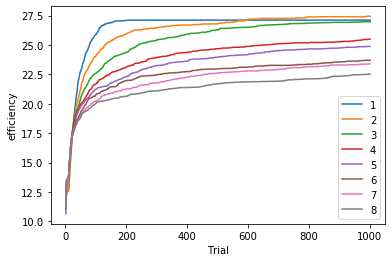

In [24]:
for i in range(8):
    hist = []
    for j in range(100):
        b, h = SimulatedAnnealing(g).main(i+1,100000,1000)
        hist.append(h)
    plt.plot([i+1 for i in range(1001)], np.mean(hist,axis=0), label = str(i+1))
plt.legend()
plt.xlabel("Trial")
plt.ylabel("efficiency")
plt.show()

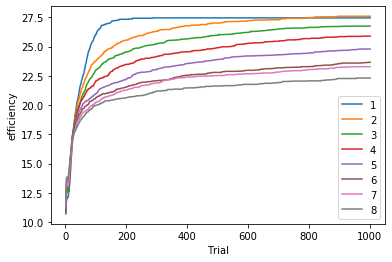

In [42]:
for i in range(8):
    hist = []
    for j in range(100):
        b, h = SimulatedAnnealing(g).main(i+1,1000000,1000)
        hist.append(h)
    plt.plot([i+1 for i in range(1001)], np.mean(hist,axis=0), label = str(i+1))
plt.legend()
plt.xlabel("Trial")
plt.ylabel("efficiency")
plt.show()

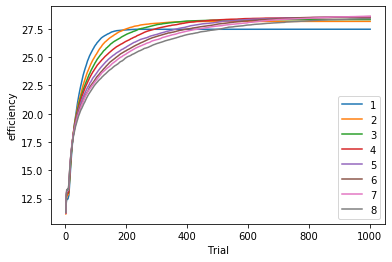

In [28]:
for i in range(8):
    hist = []
    for j in range(1000):
        b, h = SimulatedAnnealing(g).main(i+1,100000,1000)
        hist.append(h)
    plt.plot([i+1 for i in range(1001)], np.mean(hist,axis=0), label = str(i+1))
plt.legend()
plt.xlabel("Trial")
plt.ylabel("efficiency")
plt.show()

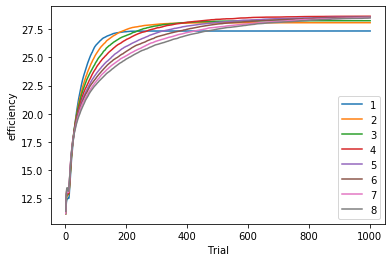

In [38]:
for i in range(8):
    hist = []
    for j in range(1000):
        b, h = SimulatedAnnealing(g).main(i+1,1000000,1000)
        hist.append(h)
    plt.plot([i+1 for i in range(1001)], np.mean(hist,axis=0), label = str(i+1))
plt.legend()
plt.xlabel("Trial")
plt.ylabel("efficiency")
plt.show()

In [37]:
b,h = SimulatedAnnealing(g).main(4,1000000,1000)#step_size,temperature,epoch
write("./output30.txt",b[0])
print(b)

[array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0]), 30]
